# Analyse Exploratoire

### Import des modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### configuration d'affichage

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

#### Nous observons ici la taille du dataset ainsi que les premières lignes pour comprendre sa structure.
#### Ensuite, nous listons les colonnes et leurs types de données afin d'identifier les variables quantitatives et qualitatives.

In [3]:
building_consumption = pd.read_csv('../data/2016BuildingEnergyBenchmarking.csv')

building_consumption_raw = building_consumption.copy()

print(f"✅ Dataset chargé : {building_consumption_raw.shape[0]} lignes et {building_consumption_raw.shape[1]} colonnes")

✅ Dataset chargé : 3376 lignes et 46 colonnes


In [4]:
building_consumption_raw.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [5]:
building_consumption_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
building_consumption_raw.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
building_consumption_raw.shape

(3376, 46)

#### Maintenant que nous avons l'ensemble des informations sur notre dataset, nous allons pouvoir avancer sur les autres étapes attendues.
- comment un batiment est défini dans ce jeu de données
- le nombre de valeurs manquantes par colonne ainsi que leur type

### Comment un batiment est défini dans le dataset
#### Recherche de la colonne de type de bâtiment

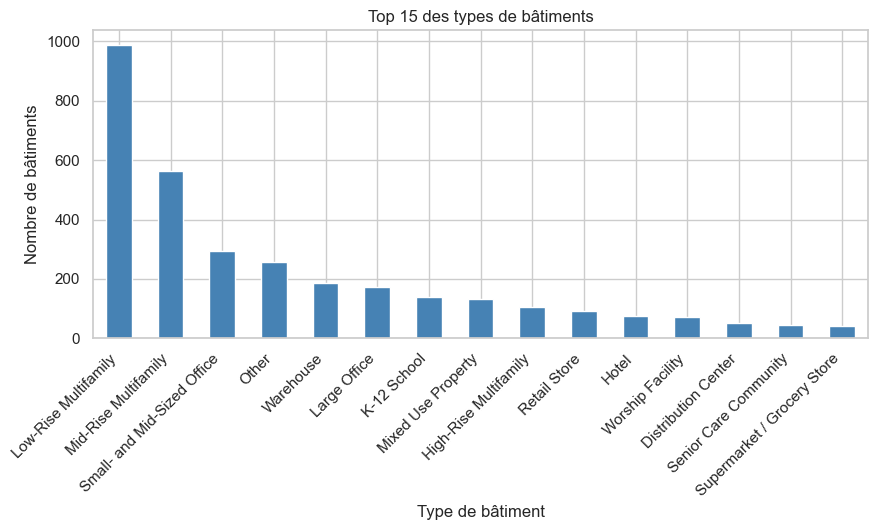

In [8]:
# Comment un batiment est défini dans le dataset

# Recherche de la colonne de type de bâtiment
prop_col = [c for c in building_consumption_raw.columns if "PropertyType" in c or "PrimaryPropertyType" in c][0]
building_consumption_raw[prop_col].value_counts().head(15).plot(kind='bar', figsize=(10,4), color='steelblue')
plt.title("Top 15 des types de bâtiments")
plt.xlabel("Type de bâtiment")
plt.ylabel("Nombre de bâtiments")
plt.xticks(rotation=45, ha='right')
plt.show()

### taux de valeurs manquantes dans notre dataset

In [9]:
missing = building_consumption_raw.isna().sum().sort_values(ascending=False)
missing_pct = (building_consumption_raw.isna().mean() * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({"missing": missing, "missing_%": missing_pct})
missing_df.head(20)

,missing,missing_%
Comments,3376,100.000000
Outlier,3344,99.052133
YearsENERGYSTARCertified,3257,96.475118
ThirdLargestPropertyUseType,2780,82.345972
ThirdLargestPropertyUseTypeGFA,2780,82.345972
SecondLargestPropertyUseType,1697,50.266588
SecondLargestPropertyUseTypeGFA,1697,50.266588
ENERGYSTARScore,843,24.970379
LargestPropertyUseTypeGFA,20,0.592417
LargestPropertyUseType,20,0.592417


#### Certaines colonnes contiennent des valeurs manquantes.
#### Plutôt que de tout supprimer, nous identifions les plus concernées pour décider du meilleur traitement.

## Définition de la target (variable cible)

#### L’objectif du projet est de **prédire la consommation énergétique** des bâtiments.

#### Le dataset contient plusieurs mesures liées à l’énergie et aux émissions :
- **EUI (Energy Use Intensity)** → mesure standardisée de la consommation d’énergie, exprimée en kBtu/ft².
- **Site EUI** : consommation totale d’énergie mesurée sur le site.
- **Source EUI** : consommation totale d’énergie corrigée en fonction des pertes de transport.
- **Total GHG Emissions** : émissions totales de gaz à effet de serre associées.

#### Nous devons choisir **une seule variable cible** cohérente avec notre objectif de prédiction.

In [10]:
energy_candidates = [
    c for c in building_consumption_raw.columns
    if any(keyword in c.lower() for keyword in ["eui", "energy use", "ghg", "emission"])
]

print("Colonnes candidates pour la target :")
for col in energy_candidates:
    print("-", col)

Colonnes candidates pour la target :
- SiteEUI(kBtu/sf)
- SiteEUIWN(kBtu/sf)
- SourceEUI(kBtu/sf)
- SourceEUIWN(kBtu/sf)
- TotalGHGEmissions
- GHGEmissionsIntensity


### Exploration des variables candidates

### Nous allons comparer rapidement la distribution de ces variables pour repérer :
- Les colonnes avec beaucoup de valeurs manquantes.
- Les colonnes avec des valeurs incohérentes ou extrêmes.
- Les unités et plages de valeurs.

### Cela nous aidera à identifier la variable la plus exploitable pour la modélisation.

In [11]:
summary = pd.DataFrame({
    "missing_%": building_consumption_raw[energy_candidates].isna().mean() * 100,
    "min": building_consumption_raw[energy_candidates].min(),
    "max": building_consumption_raw[energy_candidates].max(),
    "mean": building_consumption_raw[energy_candidates].mean(),
}).round(2)

summary.sort_values("missing_%")

,missing_%,min,max,mean
SiteEUIWN(kBtu/sf),0.18,0.00,834.40,57.03
SiteEUI(kBtu/sf),0.21,0.00,834.40,54.73
SourceEUI(kBtu/sf),0.27,0.00,2620.00,134.23
SourceEUIWN(kBtu/sf),0.27,-2.10,2620.00,137.78
TotalGHGEmissions,0.27,-0.80,16870.98,119.72
GHGEmissionsIntensity,0.27,-0.02,34.09,1.18


### On compare visuellement les distributions des principales variables candidates (EUI, GHG, etc.)
### Cela permet de détecter :
- Les variables très asymétriques ou avec des valeurs aberrantes.
- Les échelles très différentes.

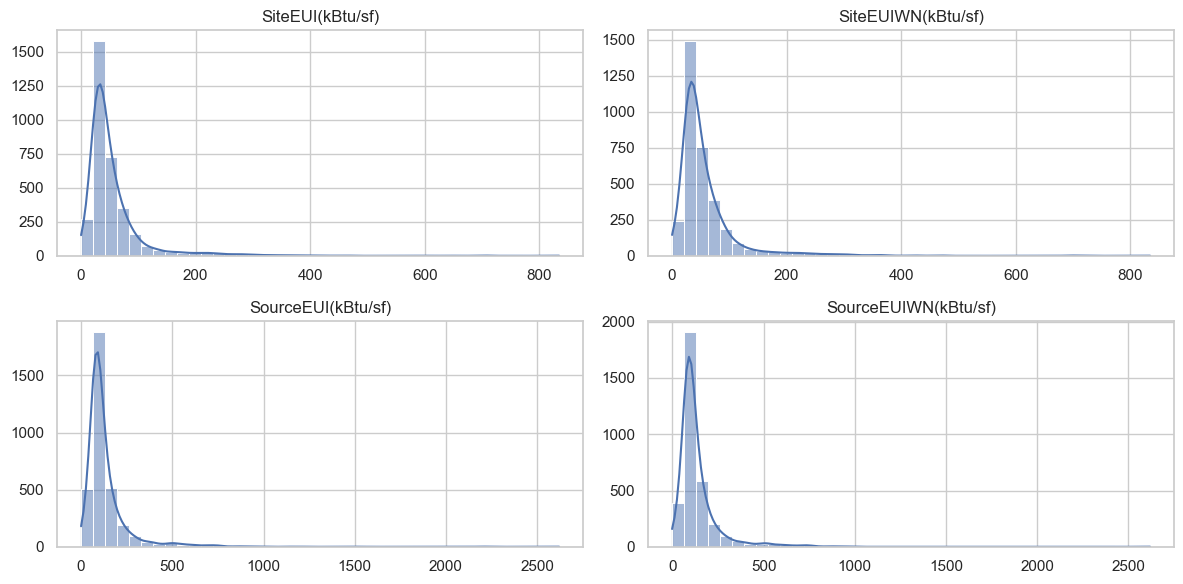

In [12]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(energy_candidates[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(building_consumption_raw[col].dropna(), bins=40, kde=True)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

### Choix final pourrait légitimement selectionner  de la variable cible : *SiteEUIWN (kBtu/ft²)*

### La variable **SiteEUIWN (kBtu/ft²)** est retenue comme target pour les raisons suivantes :
1. Elle exprime la **quantité d’énergie consommée par unité de surface**, ce qui permet de comparer des bâtiments de tailles différentes.
2. C’est une **métrique standardisée** utilisée par la mairie de Seattle pour ses benchmarks énergétiques.
3. Elle présente **moins de valeurs manquantes** que d’autres mesures comme le “Source EUI” ou les émissions de GHG.
4. Sa distribution, bien qu’asymétrique, est exploitable après un nettoyage et éventuellement une normalisation.

### Nous allons donc utiliser cette colonne comme variable cible pour la suite du projet.

✅ Variable cible retenue : SiteEUIWN(kBtu/sf)


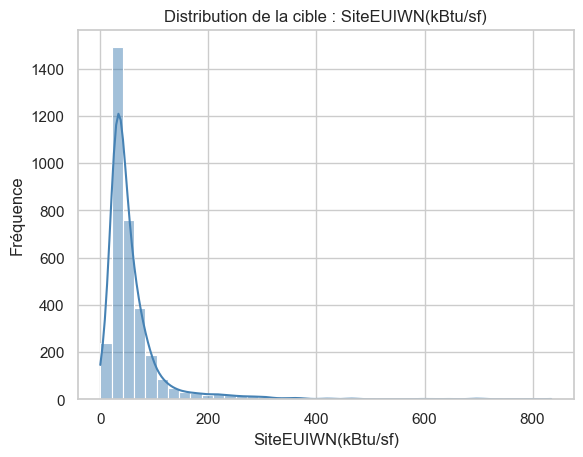

In [13]:
target = [c for c in building_consumption_raw.columns if "siteeuiwn" in c.lower()][0]
print("✅ Variable cible retenue :", target)

sns.histplot(building_consumption_raw[target].dropna(), bins=40, kde=True, color='steelblue')
plt.title(f"Distribution de la cible : {target}")
plt.xlabel(target)
plt.ylabel("Fréquence")
plt.show()

### Corrélation entre la consommation énergétique (target) et les autres variables

### Afin de mieux comprendre les facteurs influençant la consommation énergétique des bâtiments,
### nous analysons la **corrélation entre la variable cible** (*Site EUI (kBtu/ft²)*)
### et plusieurs variables explicatives pertinentes, notamment :

- la **surface du bâtiment** (Gross Floor Area) ;
- l’**année de construction** (Year Built) ;
- le **type de bâtiment** (Property Type).

### Cela nous permettra d’identifier les variables les plus influentes,
### et de repérer d’éventuelles relations non linéaires ou catégories énergivores.

In [14]:
# Identification des colonnes clés
gfa_col = [c for c in building_consumption_raw.columns if "floorarea" in c.lower() or "gfa" in c.lower()][0]
year_col = [c for c in building_consumption_raw.columns if "yearbuilt" in c.lower()][0]
prop_col = [c for c in building_consumption_raw.columns if "propertytype" in c.lower() or "building type" in c.lower()][0]

print("Colonnes clés détectées :")
print(" - Surface :", gfa_col)
print(" - Année de construction :", year_col)
print(" - Type de bâtiment :", prop_col)

Colonnes clés détectées :
 - Surface : PropertyGFATotal
 - Année de construction : YearBuilt
 - Type de bâtiment : PrimaryPropertyType


###  Corrélation numérique

#### On calcule ici le coefficient de corrélation de Pearson entre la variable cible
#### et les variables quantitatives disponibles.
#### Cela permet de repérer les relations linéaires potentielles.

In [15]:
num_cols = building_consumption_raw.select_dtypes(include=[np.number]).columns
corr_matrix = building_consumption_raw[num_cols].corr()

corr_target = corr_matrix[target].sort_values(ascending=False).dropna()
corr_target.head(10)

SiteEUIWN(kBtu/sf)       1.000000
SiteEUI(kBtu/sf)         0.993549
SourceEUIWN(kBtu/sf)     0.938051
SourceEUI(kBtu/sf)       0.930434
GHGEmissionsIntensity    0.745573
SiteEnergyUseWN(kBtu)    0.394437
TotalGHGEmissions        0.274616
SiteEnergyUse(kBtu)      0.272799
NaturalGas(kBtu)         0.262725
NaturalGas(therms)       0.262725
Name: SiteEUIWN(kBtu/sf), dtype: float64

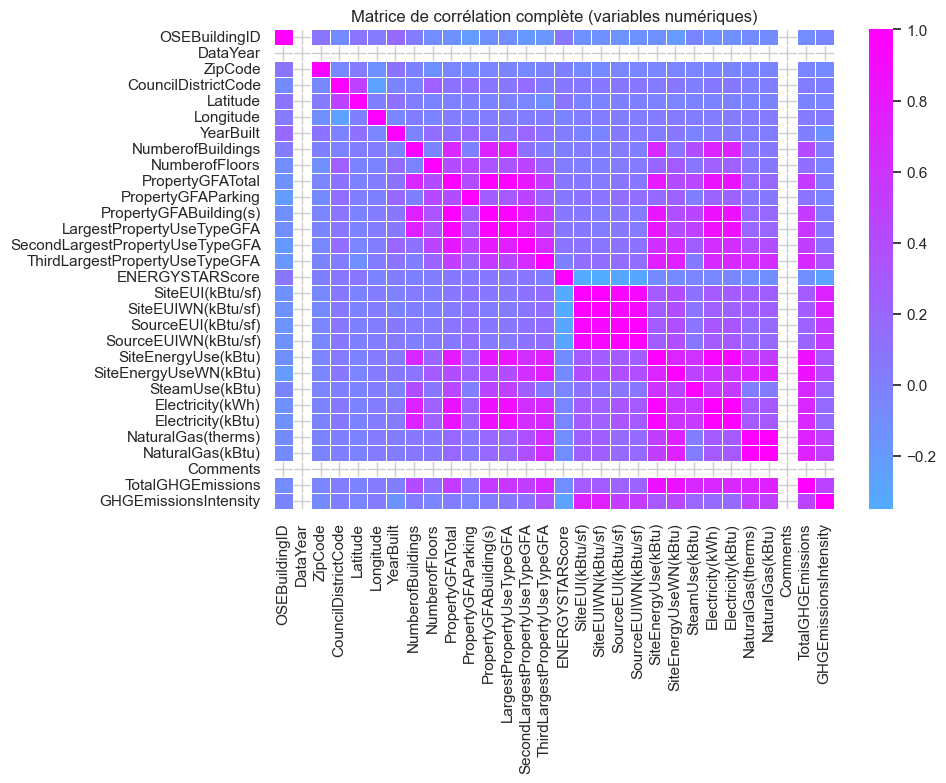

In [16]:
# Heatmap complète (vue d’ensemble)
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    cmap="cool",
    center=0,
    annot=False,
    linewidths=0.5
)
plt.title("Matrice de corrélation complète (variables numériques)")
plt.tight_layout()
plt.show()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_5452\3481118692.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


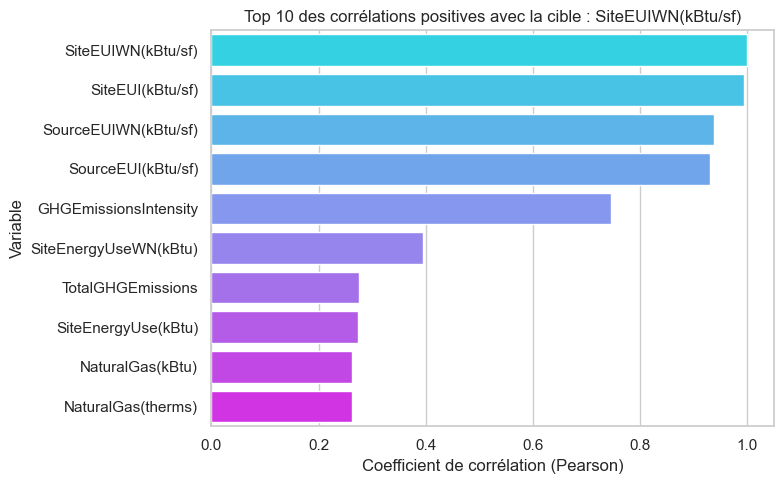

In [17]:
# Calcul des corrélations avec la target
num_cols = building_consumption_raw.select_dtypes(include=[np.number]).columns
corr_matrix = building_consumption_raw[num_cols].corr()
corr_target = corr_matrix[target].sort_values(ascending=False).dropna()

# Visualisation : barplot horizontal
plt.figure(figsize=(8,5))
sns.barplot(
    x=corr_target.head(10).values,
    y=corr_target.head(10).index,
    palette="cool"
)
plt.title(f"Top 10 des corrélations positives avec la cible : {target}")
plt.xlabel("Coefficient de corrélation (Pearson)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

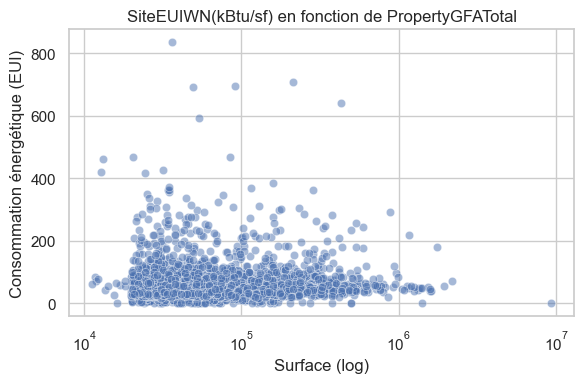

In [18]:
# relation entre la consommation et la surface du bâtiment
plt.figure(figsize=(6,4))
sns.scatterplot(x=building_consumption_raw[gfa_col], y=building_consumption_raw[target], alpha=0.5)
plt.xscale("log")
plt.title(f"{target} en fonction de {gfa_col}")
plt.xlabel("Surface (log)")
plt.ylabel("Consommation énergétique (EUI)")
plt.tight_layout()
plt.show()

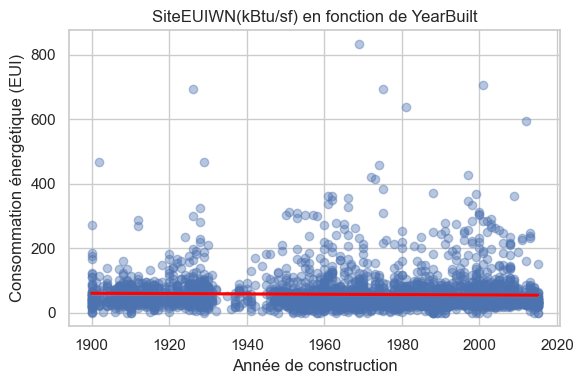

In [19]:
# Relation entre la consommation et l’année de construction
plt.figure(figsize=(6,4))
sns.regplot(x=building_consumption_raw[year_col], y=building_consumption_raw[target], scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title(f"{target} en fonction de {year_col}")
plt.xlabel("Année de construction")
plt.ylabel("Consommation énergétique (EUI)")
plt.tight_layout()
plt.show()

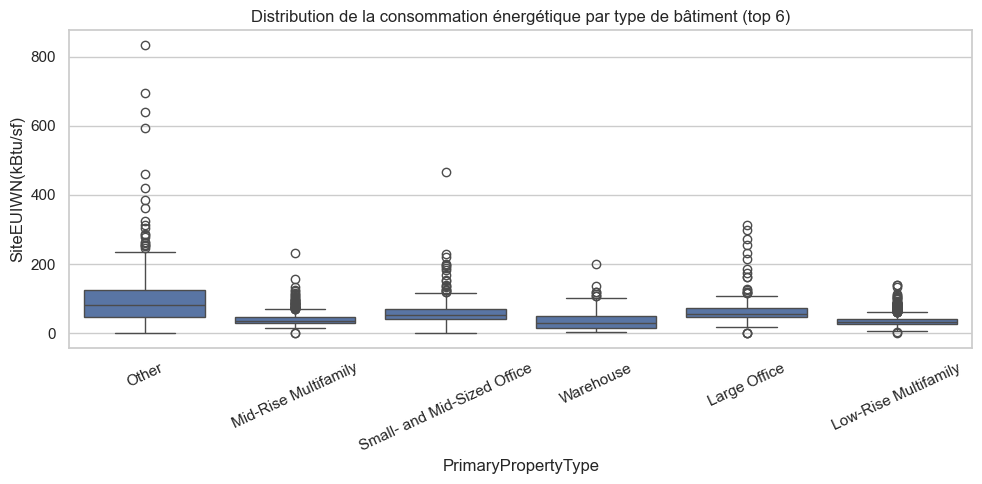

In [20]:
# Top 6 types de bâtiments les plus fréquents
top_types = building_consumption_raw[prop_col].value_counts().head(6).index
subset = building_consumption_raw[building_consumption_raw[prop_col].isin(top_types)]

plt.figure(figsize=(10,5))
sns.boxplot(x=prop_col, y=target, data=subset)
plt.title("Distribution de la consommation énergétique par type de bâtiment (top 6)")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

### Malgrés le choix , il y a un point à ne pas occulter et sur lequel il faut etre vigilent

## le dataleakage (fuites de données)

### dans nos analyses precedentes nous pouvons observer que l'ensemble des features que nous avons trouver et que semble etre le plus correlées, ont en faites un point commun : elles contiennent toutes des données en lien avec des valeurs energétiques
### Ce qui dans notre cas pourrait aboutir au cas suivant :
- Fuite cible (target leakage)
  - Utiliser une variable construite à partir de la cible ou hautement corrélée car mesurée après l’événement à prédire.

### Choix/usage de variables dérivées de la consommation énergétique
- Les features corrélées ont en commun de contenir des données en lien avec des valeurs énergétiques. Dans ce dataset, beaucoup de colonnes (p. ex. `Total Energy Use (kBtu)`, `Site EUI`, `Source EUI`, `Weather Normalized ...`, `ENERGY STAR Score`, `Total GHG Emissions`, `Electricity Use (kWh)`, `Natural Gas Use (therms)`) sont directement calculées à partir des consommations.
- Prédire `SiteEUIWN` en utilisant d’autres indicateurs d’intensité ou de consommation revient à utiliser des quasi‑doublons de la cible → fuite cible/tautologie. Le modèle « apprend » une transformation de la cible plutôt que les facteurs explicatifs du bâtiment.


## Clean du dataset

### Nous allons donc supprimer l'ensemble des colonnes similaires à la colonne "SiteEUI WN"
### pour eviter au maximum les risques d'overfitting lors de l'entrainement des modeles

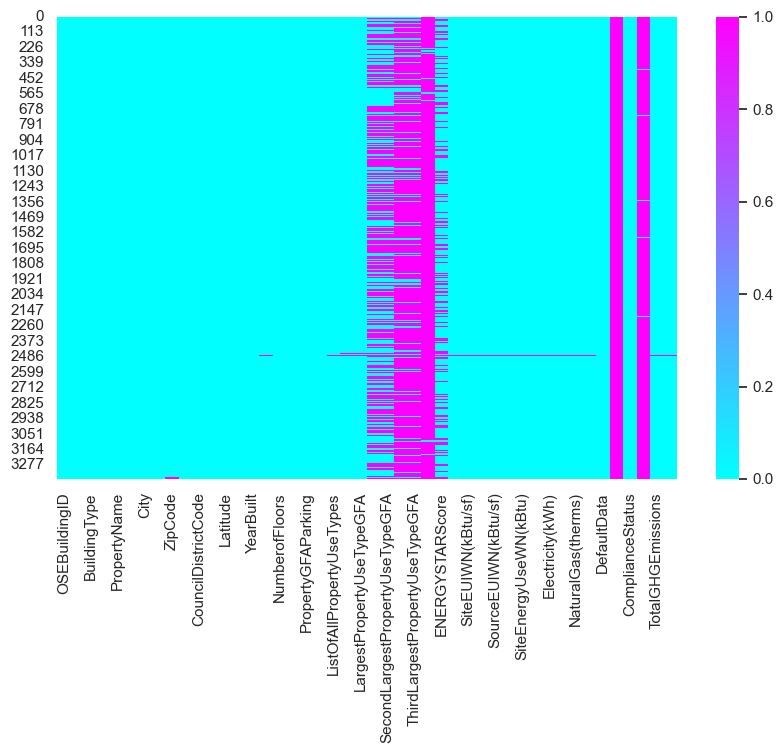

In [21]:
plt.figure(figsize=(10,6))
heatmaps = sns.heatmap(building_consumption_raw.isna(), cmap='cool')
plt.show()

In [22]:
import re

# 1) Cible: nom exact dans votre fichier
TARGET = "SiteEUIWN(kBtu/sf)"
assert TARGET in building_consumption_raw.columns, f"Colonne cible introuvable: {TARGET}"

# 2) Regex pour détecter les colonnes énergie/émissions à SUPPRIMER
energy_regex = re.compile(
    r"(eui|kwh|kbtu|mmbtu|therm|consumption|energy\s*use|intensity|ghg|emission|steam|electric|electricity|natural\s*gas|district|fuel|source|site|weather\s*normalized|energy\s*star)",
    re.I
)

# 3) Lister les colonnes à drop (toutes celles qui matchent la regex, SAUF la cible)
all_cols = building_consumption_raw.columns.tolist()
energy_cols = [c for c in all_cols if energy_regex.search(c)]

# ne JAMAIS drop la cible
drop_cols = sorted([c for c in energy_cols if c != TARGET])

print(f"Colonnes énergie détectées (hors target) à supprimer: {len(drop_cols)}")
for c in drop_cols[:40]:
    print(" -", c)
if len(drop_cols) > 40:
    print(" ... (tronqué)")

# 4) Construire la version clean (on garde la cible)
building_clean = building_consumption_raw.drop(columns=drop_cols, errors="ignore").copy()

# 5) Contrôles: aucune colonne énergie (hors target) ne doit rester
leftover_energy = [c for c in building_clean.columns if c != TARGET and energy_regex.search(c)]
assert len(leftover_energy) == 0, (
    "Certaines colonnes énergétiques sont encore présentes: " + ", ".join(leftover_energy)
)

print("\n✅ Vérifications OK: seule la cible énergétique est conservée.")
print("Dimensions avant/après:", building_consumption_raw.shape, "->", building_clean.shape)

# 6) Export CSV (adaptez le chemin de sortie)
output_path = r"C:\\Users\\Utilisateur\\PycharmProjects\\projet6-features-engineering\\data\\2016BuildingEnergyBenchmarking_clean_no_energy.csv"
building_clean.to_csv(output_path, index=False)
print(f"\n💾 Fichier exporté: {output_path}")

Colonnes énergie détectées (hors target) à supprimer: 15
 - CouncilDistrictCode
 - ENERGYSTARScore
 - Electricity(kBtu)
 - Electricity(kWh)
 - GHGEmissionsIntensity
 - NaturalGas(kBtu)
 - NaturalGas(therms)
 - SiteEUI(kBtu/sf)
 - SiteEnergyUse(kBtu)
 - SiteEnergyUseWN(kBtu)
 - SourceEUI(kBtu/sf)
 - SourceEUIWN(kBtu/sf)
 - SteamUse(kBtu)
 - TotalGHGEmissions
 - YearsENERGYSTARCertified

✅ Vérifications OK: seule la cible énergétique est conservée.
Dimensions avant/après: (3376, 46) -> (3376, 31)

💾 Fichier exporté: C:\\Users\\Utilisateur\\PycharmProjects\\projet6-features-engineering\\data\\2016BuildingEnergyBenchmarking_clean_no_energy.csv


In [23]:
building_consumption_no_energy = pd.read_csv('../data/2016BuildingEnergyBenchmarking_clean_no_energy.csv')

building_consumption_energyless_raw = building_consumption_no_energy.copy()

print(f"✅ Dataset chargé : {building_consumption_energyless_raw.shape[0]} lignes et {building_consumption_energyless_raw.shape[1]} colonnes")

✅ Dataset chargé : 3376 lignes et 31 colonnes


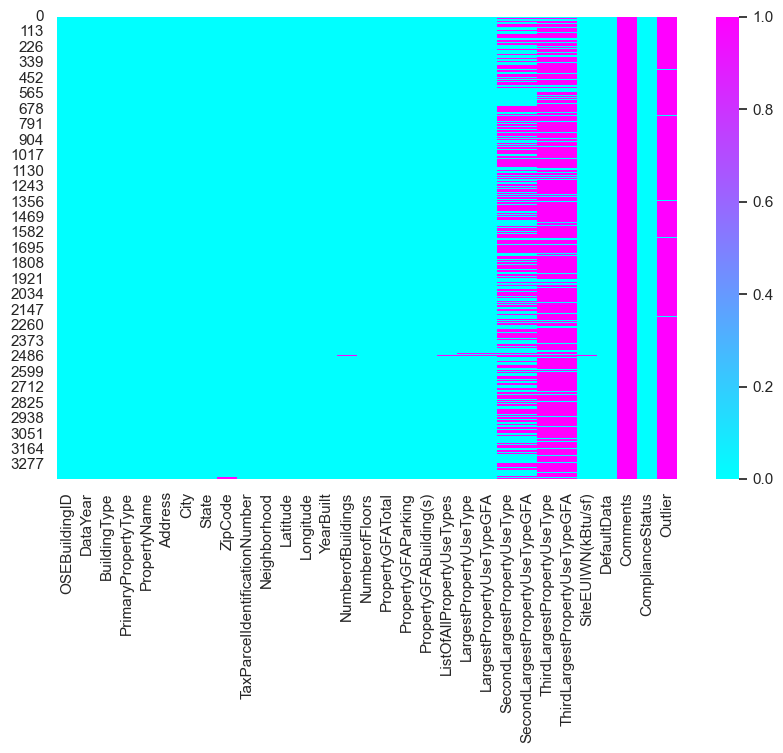

In [24]:
plt.figure(figsize=(10,6))
heatmaps = sns.heatmap(building_consumption_energyless_raw.isna(), cmap='cool')
plt.show()

In [25]:
missing = building_consumption_energyless_raw.isna().sum().sort_values(ascending=False)
missing_pct = (building_consumption_energyless_raw.isna().mean() * 100).sort_values(ascending=False)
missing_colonne_df = pd.DataFrame({"missing": missing, "missing_%": missing_pct})
missing_colonne_df.head(20)

,missing,missing_%
Comments,3376,100.000000
Outlier,3344,99.052133
ThirdLargestPropertyUseTypeGFA,2780,82.345972
ThirdLargestPropertyUseType,2780,82.345972
SecondLargestPropertyUseTypeGFA,1697,50.266588
SecondLargestPropertyUseType,1697,50.266588
LargestPropertyUseTypeGFA,20,0.592417
LargestPropertyUseType,20,0.592417
ZipCode,16,0.473934
ListOfAllPropertyUseTypes,9,0.266588


In [26]:
# Vérification de la présence de la cible
assert TARGET in building_consumption_energyless_raw.columns, f"Colonne cible introuvable: {TARGET}"

# 2) Colonnes supplémentaires à supprimer (si présentes)
extra_drop = [
    "Comments",
    "Outlier",
    "ThirdLargestPropertyUseTypeGFA",
    "ThirdLargestPropertyUseType",
    "SecondLargestPropertyUseTypeGFA",
    "SecondLargestPropertyUseType",
]
present_extra = [c for c in extra_drop if c in building_consumption_energyless_raw.columns]

clean1 = building_consumption_energyless_raw.drop(columns=present_extra, errors='ignore').copy()
print(f"Colonnes supplémentaires supprimées: {present_extra}")

Colonnes supplémentaires supprimées: ['Comments', 'Outlier', 'ThirdLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType']


In [27]:

# 3) Supprimer les colonnes avec > 40% de valeurs manquantes (hors target)
missing_ratio_all = clean1.isna().mean()
high_na_cols = missing_ratio_all[(missing_ratio_all > 0.40) & (missing_ratio_all.index != TARGET)].index.tolist()

clean2 = clean1.drop(columns=high_na_cols, errors='ignore').copy()
print(f">40% NA supprimées: {len(high_na_cols)} colonnes")
print("Formes:", building_consumption_energyless_raw.shape, "->", clean1.shape, "->", clean2.shape)

>40% NA supprimées: 0 colonnes
Formes: (3376, 31) -> (3376, 25) -> (3376, 25)


### Pour faciliter le traitement et donc eviter des calculs supplementaires je decide de creer un colonne permettant d'avoir directement l'age du batiment ce qui serra utile dans les informations à fournir de la part de l'utilisateur pour obtenir une prediction adéquat sur ses données

In [28]:

# 4) Créer la feature BuildingAge
#    - Si DataYear existe: BuildingAge = DataYear - YearBuilt (recommandé)
#    - Sinon, fallback: (YearBuilt.max() - YearBuilt) pour un âge relatif approximatif
if "YearBuilt" in clean2.columns:
    if "DataYear" in clean2.columns:
        clean2["BuildingAge"] = clean2["DataYear"] - clean2["YearBuilt"]
    else:
        # Fallback relatif (utile pour l’ordre, moins pour l’échelle calendaire)
        clean2["BuildingAge"] = clean2["YearBuilt"].max() - clean2["YearBuilt"]

# 4-bis) Supprimer YearBuilt (devenue redondante)
drop_now = []
if "YearBuilt" in clean2.columns:
    drop_now.append("YearBuilt")

clean3 = clean2.drop(columns=drop_now, errors='ignore').copy()

In [29]:

# 5) Mise à jour des stats de valeurs manquantes sur le dataset final
missing = clean3.isna().sum().sort_values(ascending=False)
missing_pct = (clean3.isna().mean() * 100).sort_values(ascending=False)
missing_colonne_df = pd.DataFrame({"missing": missing, "missing_%": missing_pct})
print("\nTop 20 colonnes les plus manquantes (après nettoyage + drop YearBuilt):")
print(missing_colonne_df.head(20))

# 6) Journaliser les colonnes supprimées (ajoute YearBuilt au log)
log_out = r"C:\\Users\\Utilisateur\\PycharmProjects\\projet6-features-engineering\\data\\dataset_building_clean_dropped_cols.csv"
pd.Series(present_extra + high_na_cols + drop_now, name="dropped_cols").to_csv(log_out, index=False)
print(f"Journal des colonnes supprimées: {log_out}")

# 7) Exporter le dataset final sans YearBuilt
final_out = r"C:\\Users\\Utilisateur\\PycharmProjects\\projet6-features-engineering\\data\\dataset_building_clean.csv"
clean3.to_csv(final_out, index=False)
print(f"\n✅ Export: {final_out}")

# 8) (Optionnel) Continuer avec un nom parlant
building_clean_final = clean3.copy()


Top 20 colonnes les plus manquantes (après nettoyage + drop YearBuilt):
                               missing  missing_%
LargestPropertyUseTypeGFA           20   0.592417
LargestPropertyUseType              20   0.592417
ZipCode                             16   0.473934
ListOfAllPropertyUseTypes            9   0.266588
NumberofBuildings                    8   0.236967
SiteEUIWN(kBtu/sf)                   6   0.177725
OSEBuildingID                        0   0.000000
ComplianceStatus                     0   0.000000
DefaultData                          0   0.000000
PropertyGFABuilding(s)               0   0.000000
PropertyGFAParking                   0   0.000000
PropertyGFATotal                     0   0.000000
NumberofFloors                       0   0.000000
Longitude                            0   0.000000
DataYear                             0   0.000000
Latitude                             0   0.000000
Neighborhood                         0   0.000000
TaxParcelIdentificationNumb

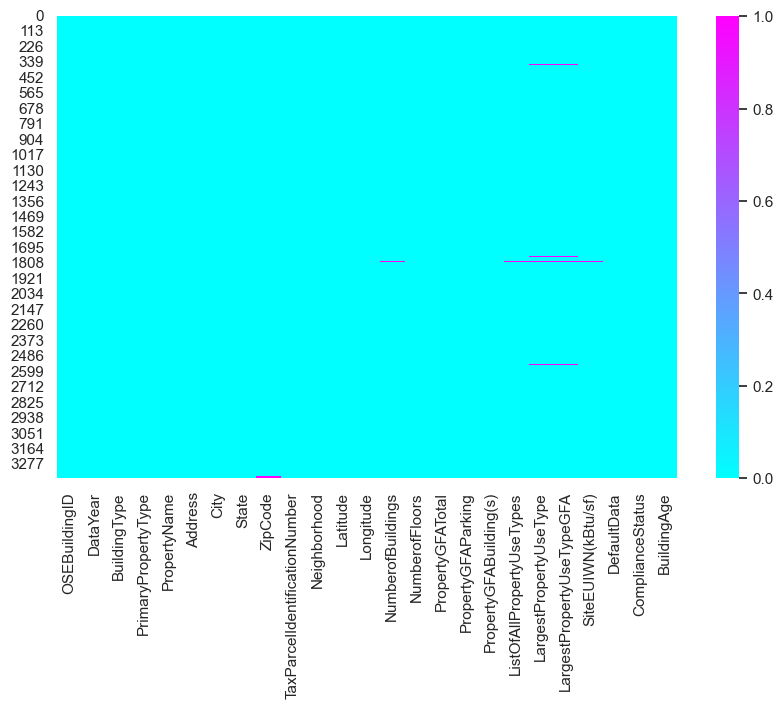

In [30]:
# heatmap des données manquantes
dfc = pd.read_csv(r"..\data\dataset_building_clean.csv")

plt.figure(figsize=(10,6))
heatmaps = sns.heatmap(dfc.isna(), cmap='cool')
plt.show()

### On observe qui reste des données manquantes quand on observe notre heatmap
### verifions quels sont elles !

In [31]:
dfc.isna().sum().sort_values(ascending=False)


LargestPropertyUseTypeGFA        20
LargestPropertyUseType           20
ZipCode                          16
ListOfAllPropertyUseTypes         9
NumberofBuildings                 8
SiteEUIWN(kBtu/sf)                6
OSEBuildingID                     0
ComplianceStatus                  0
DefaultData                       0
PropertyGFABuilding(s)            0
PropertyGFAParking                0
PropertyGFATotal                  0
NumberofFloors                    0
Longitude                         0
DataYear                          0
Latitude                          0
Neighborhood                      0
TaxParcelIdentificationNumber     0
State                             0
City                              0
Address                           0
PropertyName                      0
PrimaryPropertyType               0
BuildingType                      0
BuildingAge                       0
dtype: int64

In [32]:
# Suppose que df a été lu avec dtype=str, keep_default_na=False
df = pd.read_csv(r"..\data\dataset_building_clean.csv", dtype=str, keep_default_na=False)

# 1) Remplacer vide ou espaces par NaN
df = df.replace(r"^\s*$", pd.NA, regex=True)

# 2) Lignes qui contiennent une cellule vide (désormais NaN)
rows_with_empty = df[df.isna().any(axis=1)]
print(f"Lignes avec au moins une cellule vide: {len(rows_with_empty)}")
rows_with_empty.head(10)

# 3) Drop des lignes incomplètes
df_clean = df.dropna()

Lignes avec au moins une cellule vide: 37


In [33]:
(df_clean.isna().sum().sort_values(ascending=False))

OSEBuildingID                    0
NumberofBuildings                0
ComplianceStatus                 0
DefaultData                      0
SiteEUIWN(kBtu/sf)               0
LargestPropertyUseTypeGFA        0
LargestPropertyUseType           0
ListOfAllPropertyUseTypes        0
PropertyGFABuilding(s)           0
PropertyGFAParking               0
PropertyGFATotal                 0
NumberofFloors                   0
Longitude                        0
DataYear                         0
Latitude                         0
Neighborhood                     0
TaxParcelIdentificationNumber    0
ZipCode                          0
State                            0
City                             0
Address                          0
PropertyName                     0
PrimaryPropertyType              0
BuildingType                     0
BuildingAge                      0
dtype: int64

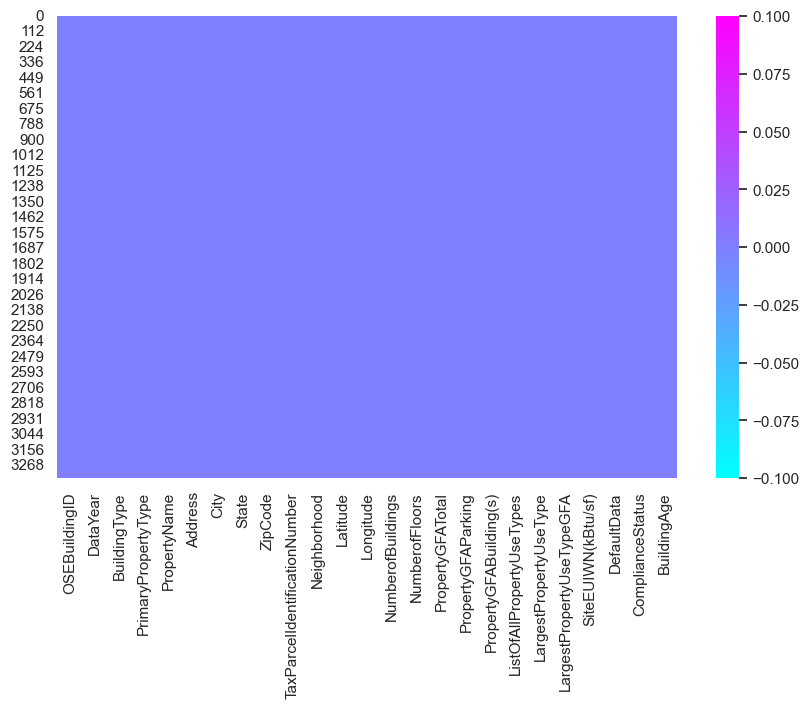

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.isna(), cmap='cool')
plt.show()

In [35]:
df_clean.shape

(3339, 25)

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3339 entries, 0 to 3359
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   OSEBuildingID                  3339 non-null   object
 1   DataYear                       3339 non-null   object
 2   BuildingType                   3339 non-null   object
 3   PrimaryPropertyType            3339 non-null   object
 4   PropertyName                   3339 non-null   object
 5   Address                        3339 non-null   object
 6   City                           3339 non-null   object
 7   State                          3339 non-null   object
 8   ZipCode                        3339 non-null   object
 9   TaxParcelIdentificationNumber  3339 non-null   object
 10  Neighborhood                   3339 non-null   object
 11  Latitude                       3339 non-null   object
 12  Longitude                      3339 non-null   object
 13  Numberof

In [37]:
out_path = r"..\data\dataset_building_cleanful.csv"
df_clean.to_csv(out_path, index=False)
print(f"✅ Export réalisé: {out_path} | lignes: {len(df_clean)} | colonnes: {df_clean.shape[1]}")

✅ Export réalisé: ..\data\dataset_building_cleanful.csv | lignes: 3339 | colonnes: 25


##  Synthèse : facteurs influençant la consommation énergétique

### D’après les analyses précédentes :

- La **surface du bâtiment** est corrélée positivement avec la consommation totale,
  mais l’EUI reste une mesure normalisée par m² → la corrélation directe est faible.
- L’**année de construction** montre une légère tendance à la baisse de la consommation
  pour les bâtiments récents.
- Le **type de bâtiment** est un facteur explicatif fort : certains usages (restaurants, hôpitaux)
  présentent une intensité énergétique beaucoup plus élevée que les bureaux ou logements.

### Ces observations guideront la **sélection des variables explicatives** pour la phase de modélisation supervisée.

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

# Modélisation 

### Import des modules 

In [38]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
# score raisonnable 0.5 /0.7
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering + Preprocessing

#### Après Analyse supplémentaire et maintenant que l'on a un dataset exempt de données manquante et abhérante
#### nous pouvons supprimer les colonnes qui n'auraient pas d'importance pour la prediction de l'energie d'un batiment.


In [39]:
non_essential_feature = pd.read_csv(r"..\data\dataset_building_cleanful.csv", dtype=str, keep_default_na=False)

cols_to_drop = [
    "PropertyName",
    "Address",
    "City",
    "State",
    "ZipCode",
    "LargestPropertyUseType",
    "ListOfAllPropertyUseTypes",
    "DefaultData",
    "ComplianceStatus",
    "Latitude",
    "Longitude",
    "TaxParcelIdentificationNumber"
]

data_op_values = non_essential_feature.drop(columns=cols_to_drop, errors="ignore")

print("Shape après drop :", data_op_values.shape)
data_op_values.head()

output_val = r"..\data\dataset_model_ready_v2.csv"  # adapte selon ton projet

data_op_values.to_csv(output_val, encoding="utf-8")
print(f"✅ Export réalisé: {output_val} | lignes: {len(df)} | colonnes: {df.shape[1]}")

Shape après drop : (3339, 13)
✅ Export réalisé: ..\data\dataset_model_ready_v2.csv | lignes: 3376 | colonnes: 25


In [40]:
data_op_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   OSEBuildingID              3339 non-null   object
 1   DataYear                   3339 non-null   object
 2   BuildingType               3339 non-null   object
 3   PrimaryPropertyType        3339 non-null   object
 4   Neighborhood               3339 non-null   object
 5   NumberofBuildings          3339 non-null   object
 6   NumberofFloors             3339 non-null   object
 7   PropertyGFATotal           3339 non-null   object
 8   PropertyGFAParking         3339 non-null   object
 9   PropertyGFABuilding(s)     3339 non-null   object
 10  LargestPropertyUseTypeGFA  3339 non-null   object
 11  SiteEUIWN(kBtu/sf)         3339 non-null   object
 12  BuildingAge                3339 non-null   object
dtypes: object(13)
memory usage: 339.2+ KB


### On remarque que les features de l'ensemble de notre dataset sont considérées comme des données "Object", cela necessite donc de remettre les features dans leurs bon type !

### pour cela nous allons appliquer le traitement suivant :

In [41]:
df = data_op_values

numeric_cols = [
    "OSEBuildingID",
    "DataYear",
    "NumberofBuildings",
    "NumberofFloors",
    "PropertyGFATotal",
    "PropertyGFAParking",
    "PropertyGFABuilding(s)",
    "LargestPropertyUseTypeGFA",
    "SiteEUIWN(kBtu/sf)",
    "BuildingAge",
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df.dtypes)

OSEBuildingID                  int64
DataYear                       int64
BuildingType                  object
PrimaryPropertyType           object
Neighborhood                  object
NumberofBuildings            float64
NumberofFloors                 int64
PropertyGFATotal               int64
PropertyGFAParking             int64
PropertyGFABuilding(s)         int64
LargestPropertyUseTypeGFA    float64
SiteEUIWN(kBtu/sf)           float64
BuildingAge                    int64
dtype: object


### Et ensuite Encoder les features dont le types est "Object", à l'aide de la cellule suivante :

In [42]:

def one_hot_encode_feature(df, col_name, encoders_dict=None):
    """
    One-hot encode UNE feature (col_name) dans df.
    Retourne :
      - le df modifié
      - un dict d'encoders pour réutilisation (inférence, etc.)
    """
    if encoders_dict is None:
        encoders_dict = {}

    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

    # On ne garde que la colonne à encoder, sous forme DataFrame
    X_col = df[[col_name]]
    encoded = encoder.fit_transform(X_col)

    # Noms des nouvelles colonnes
    new_cols = encoder.get_feature_names_out([col_name])

    encoded_df = pd.DataFrame(encoded, columns=new_cols, index=df.index)

    # On enlève la colonne originale et on ajoute les colonnes encodées
    df = pd.concat([df.drop(columns=[col_name]), encoded_df], axis=1)

    # On stocke l'encodeur si besoin plus tard
    encoders_dict[col_name] = encoder

    return df, encoders_dict

### nous allons maintenant appliqué notre Encoder, features par features. 

In [43]:
df = df.drop(columns=["OSEBuildingID"], errors="ignore")

encoders = {}

for col in ["BuildingType", "PrimaryPropertyType", "Neighborhood"]:
    df, encoders = one_hot_encode_feature(df, col, encoders)

print(df.shape)
df.head()

(3339, 58)


,DataYear,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEUIWN(kBtu/sf),BuildingAge,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mid-Rise Multifamily,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,2016,1.0,12,88434,0,88434,88434.0,84.300003,89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1.0,11,103566,15064,88502,83880.0,97.900002,20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1.0,41,956110,196718,759392,756493.0,97.699997,47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,1.0,10,61320,0,61320,61320.0,113.300003,90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,1.0,18,175580,62000,113580,123445.0,118.699997,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation.
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne.

#### Pour l'entrainement de nos modéles, nous ne pouvons prendre que des données numériques en entrée et non catégoriels pour nos predictions
#### il nous reste donc un traitement a réaliser , Encoder les features contenant des données categorielles en données numériques afin qu'elles puissent etre utile pour l'entrainement

In [44]:
categorical_features = data_op_values.select_dtypes(include=["object", "category"]).columns.tolist()
categorical_features

['BuildingType', 'PrimaryPropertyType', 'Neighborhood']

In [45]:
output = r"..\data\dataset_model_ready.csv"  # adapte selon ton projet

df.to_csv(output, encoding="utf-8")
print(f"✅ Export réalisé: {output} | lignes: {len(df)} | colonnes: {df.shape[1]}")

✅ Export réalisé: ..\data\dataset_model_ready.csv | lignes: 3339 | colonnes: 58


### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [46]:
# adapte le chemin si besoin
df = pd.read_csv(r"..\data\dataset_model_ready_v2.csv", dtype=str, keep_default_na=False)

target_col = "SiteEUIWN(kBtu/sf)"

X = df.drop(columns=[target_col])
y = df[target_col]

In [47]:
cat_cols = ["BuildingType", "PrimaryPropertyType", "Neighborhood"]

num_cols = [c for c in X.columns if c not in cat_cols]

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ]
)

In [49]:
# CODE COMPARAISON DES MODELES

models = {
    "Dummy": DummyRegressor(strategy="mean"),
    "LinearRegression": LinearRegression(),
    "SVR": SVR(),  # on tunera après avec GridSearchCV
    "RandomForest": RandomForestRegressor(random_state=42),
}

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn. 

In [51]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE

scoring = {
    "rmse": "neg_root_mean_squared_error",
    "mae": "neg_mean_absolute_error",
    "r2": "r2",
}

cv_results = {}

for name, est in models.items():
    pipe = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", est),
    ])

    scores = cross_validate(
        pipe,
        X_train,
        y_train,
        cv=5,
        scoring=scoring,
        n_jobs=-1
    )

    cv_results[name] = {
        "RMSE_mean": -scores["test_rmse"].mean(),
        "RMSE_std":  scores["test_rmse"].std(),
        "MAE_mean":  -scores["test_mae"].mean(),
        "R2_mean":    scores["test_r2"].mean(),
    }

cv_results

{'Dummy': {'RMSE_mean': 49.56451472709405,
  'RMSE_std': 4.057702954856504,
  'MAE_mean': 30.763154327427266,
  'R2_mean': -0.0047507748396955485},
 'LinearRegression': {'RMSE_mean': 18468255733.798866,
  'RMSE_std': 33083684087.244568,
  'MAE_mean': 1101572939.7950416,
  'R2_mean': -5.917460782306332e+17},
 'SVR': {'RMSE_mean': 48.088184183799946,
  'RMSE_std': 4.507494766476449,
  'MAE_mean': 24.71437247524469,
  'R2_mean': 0.0561088396355236},
 'RandomForest': {'RMSE_mean': 37.6377439591383,
  'RMSE_std': 1.8205575034590804,
  'MAE_mean': 22.284286093472172,
  'R2_mean': 0.4148405664920186}}

In [52]:
test_metrics = {}

for name, est in models.items():
    pipe = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", est),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    test_metrics[name] = {
        "RMSE_test": root_mean_squared_error(y_test, y_pred),
        "MAE_test":  mean_absolute_error(y_test, y_pred),
        "R2_test":   r2_score(y_test, y_pred),
    }

pd.DataFrame(test_metrics).T

,RMSE_test,MAE_test,R2_test
Dummy,77.918922,35.637340,-0.004938
LinearRegression,68.016754,28.074788,0.234253
SVR,76.966904,29.717068,0.019469
RandomForest,63.984780,26.614708,0.322348


In [54]:
rf_pipe = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(random_state=42)),
])

param_grid = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
}

grid = GridSearchCV(
    rf_pipe,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid.fit(X_train, y_train)

print("Best params :", grid.best_params_)
print("Best RMSE (CV) :", -grid.best_score_)

y_pred_best = grid.predict(X_test)
print("Test RMSE :", root_mean_squared_error(y_test, y_pred_best))
print("Test R2 :", r2_score(y_test, y_pred_best))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params : {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Best RMSE (CV) : 37.2731406825479
Test RMSE : 63.883251949404034
Test R2 : 0.3244970405144375


In [55]:
# Convertir les résultats en DataFrames
df_cv = pd.DataFrame(cv_results).T
df_test = pd.DataFrame(test_metrics).T

# Renommer pour plus de lisibilité
df_cv = df_cv.rename(columns={
    "RMSE_mean": "CV_RMSE",
    "MAE_mean": "CV_MAE",
    "R2_mean": "CV_R2"
})

df_test = df_test.rename(columns={
    "RMSE_test": "Test_RMSE",
    "MAE_test": "Test_MAE",
    "R2_test": "Test_R2"
})

# Fusionner les deux tableaux
results_full = df_cv.join(df_test)

# Tri par performance RMSE (CV)
results_full = results_full.sort_values(by="CV_RMSE")

# Arrondir pour une meilleure lisibilité
results_full = results_full.round(4)

results_full

,CV_RMSE,RMSE_std,CV_MAE,CV_R2,Test_RMSE,Test_MAE,Test_R2
RandomForest,3.763770e+01,1.820600e+00,2.228430e+01,4.148000e-01,63.9848,26.6147,0.3223
SVR,4.808820e+01,4.507500e+00,2.471440e+01,5.610000e-02,76.9669,29.7171,0.0195
Dummy,4.956450e+01,4.057700e+00,3.076320e+01,-4.800000e-03,77.9189,35.6373,-0.0049
LinearRegression,1.846826e+10,3.308368e+10,1.101573e+09,-5.917461e+17,68.0168,28.0748,0.2343


### Conclusion sur les performances des modèles

L’évaluation comparée des quatre modèles montre que :

RandomForestRegressor est clairement le meilleur modèle pour ce dataset.
Il offre les meilleurs scores RMSE et R², et présente un équilibre très satisfaisant entre performance en cross-validation et sur le jeu de test.
Il capture efficacement les relations non linéaires et les interactions entre variables.

SVR donne des résultats modestes dans sa configuration par défaut.
Une amélioration est possible via GridSearchCV, notamment en ajustant les hyperparamètres C, gamma et le kernel.

DummyRegressor constitue une baseline correcte.
Tous les modèles testés surpassent cette baseline, ce qui confirme que les features contiennent bien un signal informatif utile à la prédiction.

LinearRegression échoue totalement.
Les métriques explosent à cause d’un mauvais conditionnement des données (forte colinéarité entre variables, hétérogénéité des features et relation non linéaire avec la cible).
Ce modèle n’est pas adapté à ce type de données, même après normalisation partielle.

### Modèle recommandé

➡️ RandomForestRegressor est le meilleur candidat.

### Maintenant que l'on a pu déterminer le meilleur modéle parmis ceux que nous avons choisis , je peux mettre en place un script me permettant d'entrainer le modele qui a obtenu les meilleur resultat , pour l'entrainer sur nos données d'entrainement et le sauvegarder pour l'utiliser pour de futur prédiction !

In [59]:
import joblib
import os

df = pd.read_csv(r"../data/dataset_model_ready.csv")

# 1) On vire l'index perdu
df = df.drop(columns=["Unnamed: 0"])

target_col = "SiteEUIWN(kBtu/sf)"

X = df.drop(columns=[target_col])
y = df[target_col]

# 2) On garde l’ordre EXACT des features
feature_names = X.columns.tolist()

# 3) Entraînement du meilleur modèle (ex: RandomForest)
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

os.makedirs("../models", exist_ok=True)

# 4) On sauvegarde le modèle + la liste des features
joblib.dump(
    {"model": rf, "features": feature_names},
    "../models/energy_model.joblib"
)

print("✅ Modèle + features sauvegardés dans models/energy_model.joblib")

✅ Modèle + features sauvegardés dans models/energy_model.joblib
